<a href="https://colab.research.google.com/github/nourhatem2004/Movie-Recommendation-System/blob/main/MovieRecomendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting User Movie Ratings with Collaborative Filtering Algorithm**

This mini-project works on the movie-lens dataset to help beginners get a grasp on reccomender systems:

Reccomender systems can be divided into two types, content based filtering and user based filtering, today we predict ratings based on other users that might have a had a similar watching experience to us, we do so by using the collaborative filtering algorithm.

there are other algorithmswhere calculations are much faster but i think this way is great for the demonstration of training and loss reduction at each epoch rather than just using correlation and other methods like cosine similarity.

We first start by importing necessary libraries:

In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

converting our csv files, (uploaded in repositry)

In [63]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

We now need to have our sorted in a way that each user (column) has their rating at the intersection with the movie (row) in the dataset like the picture below:


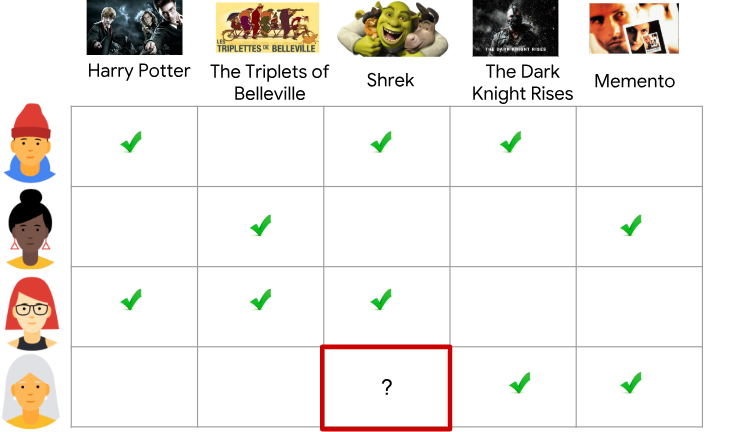


In [64]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [65]:
df = df.pivot_table(index='title', columns='userId', values='rating')
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have that done lets get our own ratings ready:

In [66]:
rated_movies_dict = {
    "Toy Story (1995)": 4,
    "Finding Nemo (2003)": 4.5,
    "Shrek (2001)": 5,
    "Inception (2010)": 4,
    'Pirates of the Caribbean: The Curse of the Black Pearl (2003)' : 2,
    "Mad Max: Fury Road (2015)": 3,
    "Gladiator (2000)": 5,
    "Iron Man (2008)": 5,
    "Titanic (1997)": 3,
    "La La Land (2016)": 2,
    "Aladdin (1992)": 5,
    "Toy Story 2 (1999)": 5,
    "Monsters, Inc. (2001)": 5,
    "Ice Age (2002)": 3,
    "Kung Fu Panda (2008)": 5,
    "WALL·E (2008)": 4,
    "Frozen (2013)": 3,
    "Moana (2016)": 4,
    "Lethal Weapon (1987)": 3,
    "Total Recall (1990)": 4,
    "Speed (1994)": 3,
    "Mission: Impossible (1996)": 3,
    "Casino Royale (2006)": 2,
    "The Raid: Redemption (2011)": 1,
    "Skyfall (2012)": 2,
    "Pretty Woman (1990)": 4,
    "Before Sunrise (1995)": 4,
    "Jerry Maguire (1996)": 4,
    "Shakespeare in Love (1998)": 2,
    "Love Actually (2003)": 3,
    "Midnight in Paris (2011)": 2,
}

my_ratings = np.full(df.index.size, np.nan)

rated_movies = []

for movie, rating in rated_movies_dict.items():
    if movie in df.index:
        index = df.index.get_loc(movie)
        my_ratings[index] = rating
        rated_movies.append(movie)
        print(f'User rated {movie} {rating}')
    else:
        print(f'Warning: Movie \"{movie}\" not found in dataset.')


User rated Toy Story (1995) 4
User rated Finding Nemo (2003) 4.5
User rated Shrek (2001) 5
User rated Inception (2010) 4
User rated Pirates of the Caribbean: The Curse of the Black Pearl (2003) 2
User rated Mad Max: Fury Road (2015) 3
User rated Gladiator (2000) 5
User rated Iron Man (2008) 5
User rated Titanic (1997) 3
User rated La La Land (2016) 2
User rated Aladdin (1992) 5
User rated Toy Story 2 (1999) 5
User rated Monsters, Inc. (2001) 5
User rated Ice Age (2002) 3
User rated Kung Fu Panda (2008) 5
User rated WALL·E (2008) 4
User rated Frozen (2013) 3
User rated Moana (2016) 4
User rated Lethal Weapon (1987) 3
User rated Total Recall (1990) 4
User rated Speed (1994) 3
User rated Mission: Impossible (1996) 3
User rated Casino Royale (2006) 2
User rated The Raid: Redemption (2011) 1
User rated Skyfall (2012) 2
User rated Pretty Woman (1990) 4
User rated Before Sunrise (1995) 4
User rated Jerry Maguire (1996) 4
User rated Shakespeare in Love (1998) 2
User rated Love Actually (2003) 

We now set our matrices up to be ready for gradient descent, Y is the movies x users R[i,j] is the state on Y[i,j] wether it has a rating or its nan, Ynorm will be used to make the gradient descent more efficient.

In [67]:
n_m = df.shape[0]
n_u = df.shape[1]
n_u = n_u + 1
n_features = 20
Y = df.to_numpy()
Y = np.c_[my_ratings, Y]
Y = np.nan_to_num(Y, nan=0)
R = np.where(Y != 0, 1, 0)
Y_mean = np.nanmean(Y, axis=1, keepdims=True)
Y_norm = (Y - Y_mean) * R
print(Y.shape)
print(R.shape)

(9719, 611)
(9719, 611)


Linear algebra implementation for cost function runs much faster than loops:

In [68]:
def cost_function(X, W, b, Y, R, lambda_):
    j = (tf.linalg.matmul(X, tf.transpose(W)) + b - Y)*R
    J = 0.5 * tf.reduce_sum(j**2) + (lambda_/2) * (tf.reduce_sum(X**2) + tf.reduce_sum(W**2))
    return J

Now we run Gradient descent on parameters W X and b:

In [69]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
lambda_ =1
epochs = 100
initializer = tf.keras.initializers.GlorotUniform()

W = tf.Variable(initializer((n_u, n_features), dtype=tf.float64), name='W')
X = tf.Variable(initializer((n_m, n_features), dtype=tf.float64), name='X')
b = tf.Variable(tf.random.uniform((1, n_u), minval=1.0, maxval=5.0, dtype=tf.float64), name='b')


iterations = 200
lambda_ = 1
for iter in range(iterations):
    with tf.GradientTape() as tape:
        cost_value = cost_function(X, W, b, Y_norm, R, lambda_)
    grads = tape.gradient( cost_value, [X,W,b] )
    optimizer.apply_gradients( zip(grads, [X,W,b]) )
    if iter % 20 == 0:
        print(f"Training loss at iteration {iter}: {cost_value:0.1f}")

Training loss at iteration 0: 112681.2
Training loss at iteration 20: 18857.9
Training loss at iteration 40: 13335.7
Training loss at iteration 60: 11917.5
Training loss at iteration 80: 11360.1
Training loss at iteration 100: 11054.0
Training loss at iteration 120: 10858.0
Training loss at iteration 140: 10719.3
Training loss at iteration 160: 10620.2
Training loss at iteration 180: 10550.4


As a way to evaluate our algorithm we can compare our predictions with our actual ratings:

In [70]:
p = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()
p = p + Y_mean
my_preds = p[:,0]

for i in range(len(my_preds)):
  if df.index[i] in rated_movies:
    print(f'User rated {df.index[i]} {my_ratings[i]} Predicted rating {my_preds[i]}')


User rated Aladdin (1992) 5.0 Predicted rating 4.70052530381447
User rated Before Sunrise (1995) 4.0 Predicted rating 3.97869756013826
User rated Casino Royale (2006) 2.0 Predicted rating 2.5681180652377296
User rated Finding Nemo (2003) 4.5 Predicted rating 4.325997628295753
User rated Frozen (2013) 3.0 Predicted rating 3.1945028297252427
User rated Gladiator (2000) 5.0 Predicted rating 4.272996135343954
User rated Ice Age (2002) 3.0 Predicted rating 3.085655036333268
User rated Inception (2010) 4.0 Predicted rating 4.116930381913431
User rated Iron Man (2008) 5.0 Predicted rating 4.739782190950073
User rated Jerry Maguire (1996) 4.0 Predicted rating 3.8488755267654846
User rated Kung Fu Panda (2008) 5.0 Predicted rating 4.217338169165273
User rated La La Land (2016) 2.0 Predicted rating 2.1841356166536725
User rated Lethal Weapon (1987) 3.0 Predicted rating 2.8908948308012183
User rated Love Actually (2003) 3.0 Predicted rating 2.8434864658131427
User rated Mad Max: Fury Road (2015) 

Now lets generate the top 10 reccomended movies for the user:

In [72]:
indices = np.argsort(my_preds)[::-1]
top_ratings = my_preds[indices[:100]]

print('Your top Movie reccomendations: ')
for i in range(20):
  if df.index[indices[i]] not in rated_movies:
    print(f'Predicted rating {top_ratings[i] if top_ratings[i] <5 else 5} for {df.index[indices[i]]}')

Your top 10 reccomendations: 
Predicted rating 5 for Mars Attacks! (1996)
Predicted rating 4.969098287504457 for Last Action Hero (1993)
Predicted rating 4.938546736785707 for Legends of the Fall (1994)
Predicted rating 4.856117216466255 for Mary Shelley's Frankenstein (Frankenstein) (1994)
Predicted rating 4.811341621437115 for American Pie 2 (2001)
Predicted rating 4.752114899091205 for Hangover, The (2009)
Predicted rating 4.6588281492756725 for Matrix, The (1999)
Predicted rating 4.653880808863554 for Tarzan (1999)
Predicted rating 4.648199852284062 for Forrest Gump (1994)
Predicted rating 4.633381790922852 for X-Men (2000)
Predicted rating 4.6226069741166995 for Shaun of the Dead (2004)
Predicted rating 4.6171657847210925 for Harry Potter and the Deathly Hallows: Part 2 (2011)
Predicted rating 4.614896134245615 for Star Trek: First Contact (1996)
Predicted rating 4.614346679559603 for Galaxy Quest (1999)
Predicted rating 4.614168147371749 for Garden State (2004)
Predicted rating 4